# Trigger efficiency study

In [1]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import exists
from typing import Union, List
from hist import Hist
from hist.intervals import clopper_pearson_interval
import vector

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import hist
import mplhep as hep

hep.style.use(["CMS", "firamath"])

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"


import sys

In [2]:

def check_selector(sample: str, selector: Union[str, List[str]]):
    if isinstance(selector, list) or isinstance(selector, tuple):     # If selector is a list or tuple
        
        for s in selector:     # Iterate over the list or tuple
            if s.startswith("*"):     # If selector starts with '*', check if the rest of the selector is in sample
                if s[1:] in sample:
                    return True
            else:
                if sample.startswith(s):
                    return True
    else:   # If selector is a single string
        if selector.startswith("*"):
            if selector[1:] in sample:
                return True
        else:
            if sample.startswith(selector):
                return True

    return False

In [3]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

#### Reading parquets for the samples

In [95]:
data_dir = "/Users/gbibim/Here/genZ"
y = "2022"
samples = {
    "2022": {
        "Zto2Q-4Jets": ["Zto2Q-4Jets_HT-400to600", "Zto2Q-4Jets_HT-600to800", "Zto2Q-4Jets_HT-800", "Zto2Q-4Jets_HT-200to400"],
        "Zto2Q-2Jets": ["Zto2Q-2Jets_PTQQ-100to200_1J", "Zto2Q-2Jets_PTQQ-200to400_1J", "Zto2Q-2Jets_PTQQ-400to600_1J", 
                        "Zto2Q-2Jets_PTQQ-600_1J", "Zto2Q-2Jets_PTQQ-100to200_2J", "Zto2Q-2Jets_PTQQ-200to400_2J", "Zto2Q-2Jets_PTQQ-400to600_2J", "Zto2Q-2Jets_PTQQ-600_2J" ],
    },
}[y]  #This is a way to retrieve the dictionary for the year "2022" from the dictionary of samples


full_samples_list = listdir(f"{data_dir}/{y}/") # list of all samples in the directory

events_dict = {}


##### If we want all the different HT and PtQQ samples together

In [96]:
for label, selector in samples.items():  #Iterating over the dictionary of samples. Label is the key and selector is the value associated with the key
    #label = Zto2Q-4Jets
    #selector = Zto2Q-4Jets_HT-400to600, Zto2Q-4Jets_HT-200to400, Zto2Q-4Jets_HT-600

    events_dict[label] = {}  # initiates an empty list for the label key in the events_dict dictionary
    print(selector)
    
    for sample in selector:
        events_dict[label][sample] = [] 
        if not check_selector(sample, selector):    # checks if the sample is in the selector list
            print(sample)
            continue
        if not exists(f"{data_dir}/{y}/{sample}/parquet"):    #checks if the parquet file exists
            print(f"No parquet file for {sample}")
            continue

        events = pd.read_parquet(f"{data_dir}/{y}/{sample}/parquet", columns=None)
        not_empty = len(events) > 0
        if not_empty:
            events_dict[label][sample] = events
        print(f"Loaded {sample: <50}: {len(events)} entries")


    # If there are any DataFrames for the current label, concatenate them
    #if events_dict[label]:
    #    all_events = pd.concat(events_dict[label].values(), ignore_index=True)
    #    events_dict[label]['all'] = all_events  # Store the concatenated DataFrame under a special key

    # If no data was loaded for the label, delete the entry
    if not events_dict[label]:
        del events_dict[label]




['Zto2Q-4Jets_HT-400to600', 'Zto2Q-4Jets_HT-600to800', 'Zto2Q-4Jets_HT-800', 'Zto2Q-4Jets_HT-200to400']
Loaded Zto2Q-4Jets_HT-400to600                           : 231480 entries
Loaded Zto2Q-4Jets_HT-600to800                           : 1493376 entries
Loaded Zto2Q-4Jets_HT-800                                : 1925423 entries
Loaded Zto2Q-4Jets_HT-200to400                           : 426 entries
['Zto2Q-2Jets_PTQQ-100to200_1J', 'Zto2Q-2Jets_PTQQ-200to400_1J', 'Zto2Q-2Jets_PTQQ-400to600_1J', 'Zto2Q-2Jets_PTQQ-600_1J', 'Zto2Q-2Jets_PTQQ-100to200_2J', 'Zto2Q-2Jets_PTQQ-200to400_2J', 'Zto2Q-2Jets_PTQQ-400to600_2J', 'Zto2Q-2Jets_PTQQ-600_2J']
Loaded Zto2Q-2Jets_PTQQ-100to200_1J                      : 10493 entries
Loaded Zto2Q-2Jets_PTQQ-200to400_1J                      : 2165983 entries
Loaded Zto2Q-2Jets_PTQQ-400to600_1J                      : 479076 entries
Loaded Zto2Q-2Jets_PTQQ-600_1J                           : 514662 entries
Loaded Zto2Q-2Jets_PTQQ-100to200_2J                      :

In [ ]:
print(events_dict.keys())

In [ ]:
print(events_dict["Zto2Q-4Jets"]["Zto2Q-4Jets_HT-400to600"])

In [ ]:
events

In [97]:
trigger_dict = {
    "HLTs": (
        [
            #"QuadPFJet70_50_40_35_PFBTagParticleNet_2BTagSum0p65",
            #"PFHT1050",

            #"AK8DiPFJet260_260_MassSD30",
            "AK8DiPFJet250_250_MassSD50",

            #"AK8PFJet275_SoftDropMass40_PFAK8ParticleNetBB0p35",
            #"AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35",
            "AK8PFJet230_SoftDropMass40_PFAK8ParticleNetBB0p35",
            
            #"AK8PFJet400_SoftDropMass40",
            "AK8PFJet230_SoftDropMass40",
            #"AK8PFJet425_SoftDropMass40",
        ],
        "label",
    ),
    
}

## Fill the histograms

In [101]:
import hist
import numpy as np

# Define histogram axes and initialize histograms
ht_bins_fine = (25, 200, 2000)
zpt_axis = hist.axis.Regular(100, 0, 1000, name="pt", label=r"Z pT$^0$ [GeV]")
fjpt_axis = hist.axis.Regular(100, 200, 1000, name="pt", label=r"fj pT$^0$ [GeV]")
sdm_axis = hist.axis.Regular(100, 0, 1000, name="SDm", label=r"SD mass [GeV]")
cat_axis = hist.axis.StrCategory([], name="cat", growth=True)
sample_axis = hist.axis.StrCategory([], name="sample_name", growth=True)
process_axis = hist.axis.StrCategory([], name="process_name", growth=True)

hpt_fj = hist.Hist(fjpt_axis, cat_axis, sample_axis, process_axis)
hpt_z = hist.Hist(zpt_axis, cat_axis, sample_axis, process_axis)
hsd = hist.Hist(sdm_axis, cat_axis, sample_axis, process_axis)

use_default_weight = False    # If True, the weight is set to 1 for all events

# Fill histograms for each sample
for label, sample_dict in events_dict.items():
    for sample_name, events in sample_dict.items():
        pt_z = events["GenVPt"][0]
        pt_fj = events["ak8FatJetPt"][0]
        SDm_fj = events["ak8FatJetmsoftdrop"][0]
        wd = events["weight"][0]
        
        selection = SDm_fj > 0   #40

        # Determine weight to use
        weight = 1 if use_default_weight else wd[selection]

        # Fill histograms for the sample
        hpt_fj.fill(pt=pt_fj[selection], cat="denominator", sample_name=sample_name, process_name=label, weight=weight)
        hpt_z.fill(pt=pt_z[selection], cat="denominator", sample_name=sample_name, process_name=label, weight=weight)
        hsd.fill(SDm=SDm_fj[selection], cat="denominator", sample_name=sample_name, process_name=label, weight=weight)

        # Fill histograms for 'todas' category
        hpt_fj.fill(pt=pt_fj, cat="denominator", sample_name=label, process_name=label, weight=wd)
        hpt_z.fill(pt=pt_z, cat="denominator", sample_name=label, process_name=label, weight=wd)
        hsd.fill(SDm=SDm_fj, cat="denominator", sample_name=label, process_name=label, weight=wd)

        # Fill histograms for each trigger category
        for trigger_title, (triggers, trigger_label) in trigger_dict.items():
            #trigger_selection = np.zeros_like(selection, dtype=bool)
            for hlt in triggers:
                trigger_selection = np.zeros_like(selection, dtype=bool)
                trigger_selection |= (events[hlt].values == 1).squeeze()    #Use bitwise OR (|=) to update trigger_selection to True wherever any trigger condition is met.
                                                                            # squeeze() removes any single-dimensional entries from the shape of the array.
                num_selection = trigger_selection & selection

                weight = 1 if use_default_weight else wd[num_selection]

                hpt_fj.fill(pt=pt_fj[num_selection], cat=hlt, sample_name=sample_name, process_name=label, weight=weight)
                hpt_z.fill(pt=pt_z[num_selection], cat=hlt, sample_name=sample_name, process_name=label, weight=weight)
                hsd.fill(SDm=SDm_fj[num_selection], cat=hlt, sample_name=sample_name, process_name=label, weight=weight)
                
                hpt_fj.fill(pt=pt_fj[num_selection], cat=hlt, sample_name=label, process_name=label, weight=weight)
                hpt_z.fill(pt=pt_z[num_selection], cat=hlt, sample_name=label, process_name=label, weight=weight)
                hsd.fill(SDm=SDm_fj[num_selection], cat=hlt, sample_name=label, process_name=label, weight=weight)


### Plots the denominators

In [ ]:
# Plot of the denominator comparing LO to NLO
fig, ax = plt.subplots()
for label in samples.keys():
    hep.histplot(hpt_z[{"cat": "denominator", "sample_name": label, "process_name": label}], ax=ax, label=label)
ax.legend()
plt.title(f"Denominator Comparison")
#plt.savefig(f"plots/Zpt_denominator_comparison_withWeights.png")

In [110]:
import matplotlib.pyplot as plt
import hist

def plot_den(hist_to_plot, output_dir, var):
    """
    Plot denominator histograms and save them to files.
    
    Args:
        hist_to_plot (dict): Dictionary of histograms to plot.
        output_dir (str): Directory where the plots will be saved.
        var (str): Variable name to include in the plot filenames.
    """
    for label, selector in samples.items():
        #label = Zto2Q-4Jets
        #selector = Zto2Q-4Jets_HT-400to600, Zto2Q-4Jets_HT-200to400, Zto2Q-4Jets_HT-600

        # Plot for each sample in selector
        fig, ax = plt.subplots()
        for i, sample in enumerate(selector):
            h = hist_to_plot[{"cat": "denominator", "sample_name": sample, "process_name": label}]
            hep.histplot(h, ax=ax, label=sample)
            total_counts = sum(h.values())
            # Position the annotation based on the index to avoid overlap
            ax.text(0.95, 0.95 - i*0.05, f'{sample} counts: {total_counts}', 
                    ha='right', va='top', transform=ax.transAxes, 
                    bbox=dict(facecolor='white', alpha=0.5))
        ax.legend()
        plt.title(f"Denominator Histograms for {label}")
        #plt.xlabel('Bins')
        plt.ylabel('Counts')
        #plt.savefig(f"{output_dir}/{var}_denominator_{label}.png")  # Save the plot as a PNG file
        #plt.close(fig)  # Close the figure to free up memory


# Define the output directory where plots will be saved
output_dir = "plots"

# Create the output directory if it does not exist
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


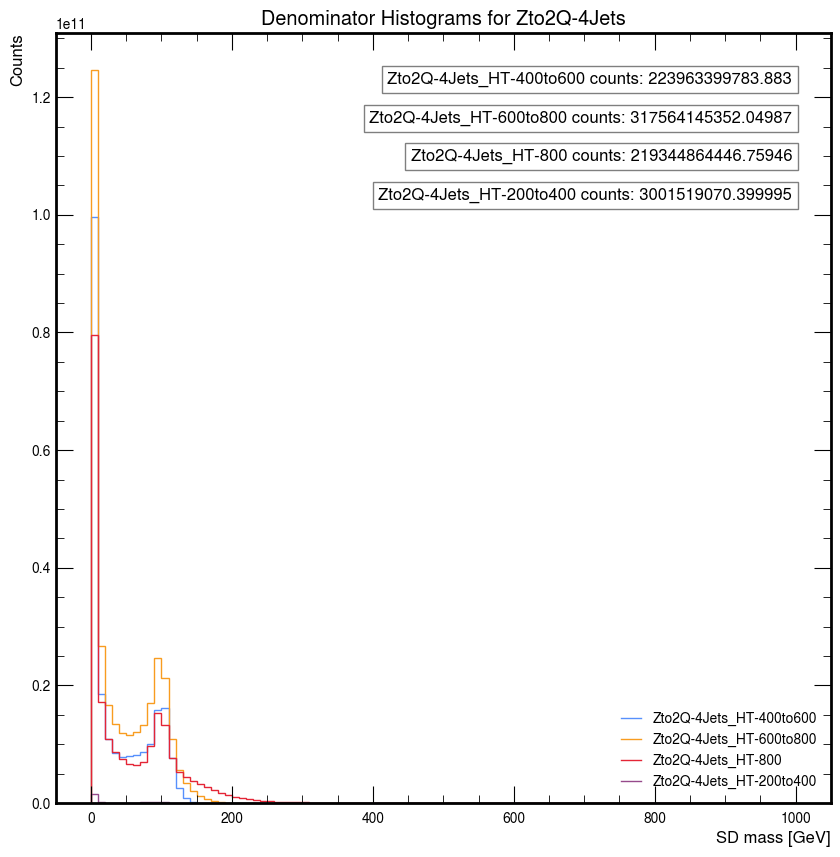

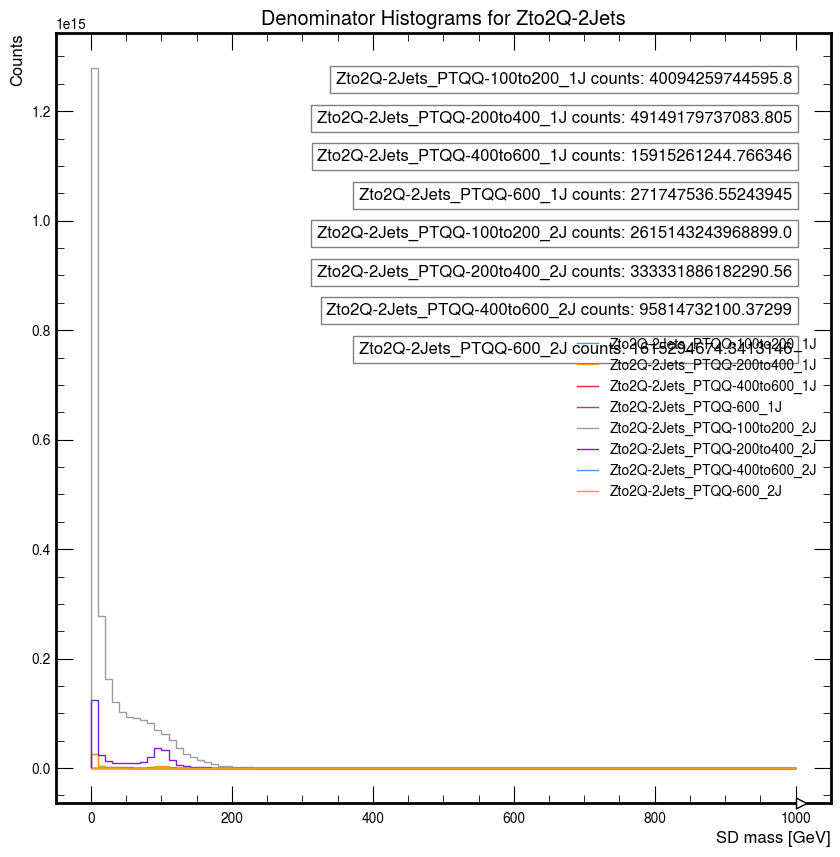

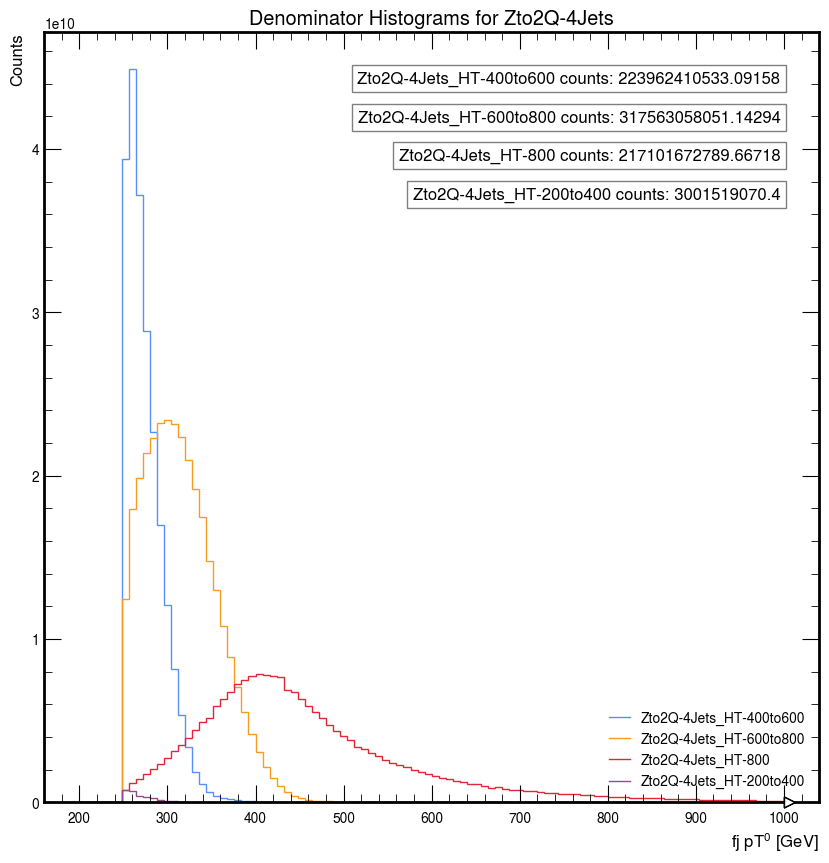

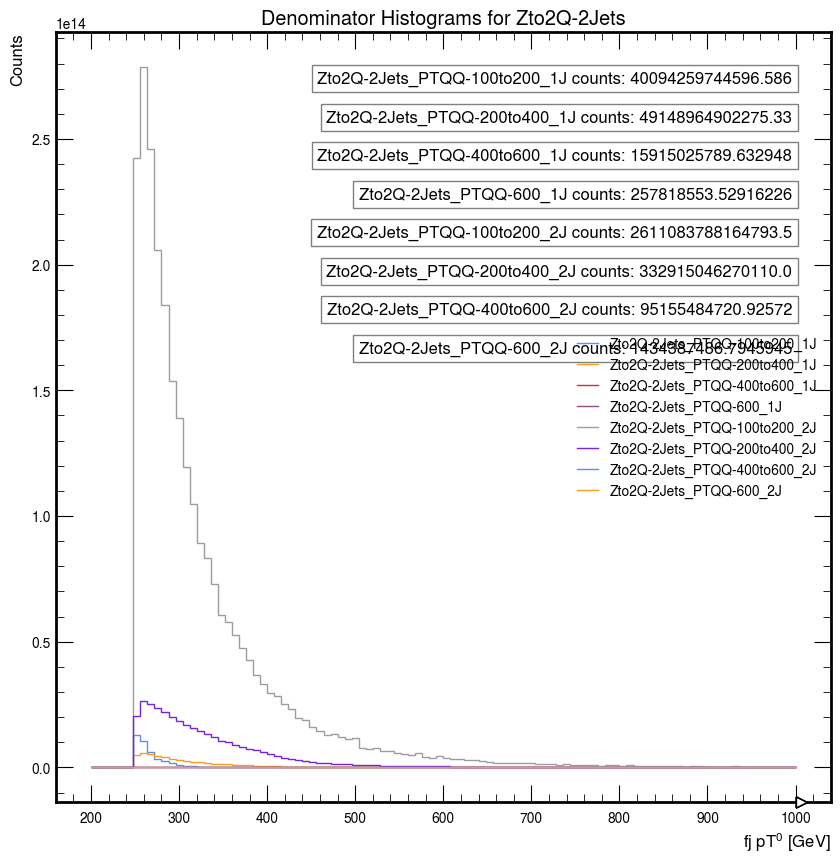

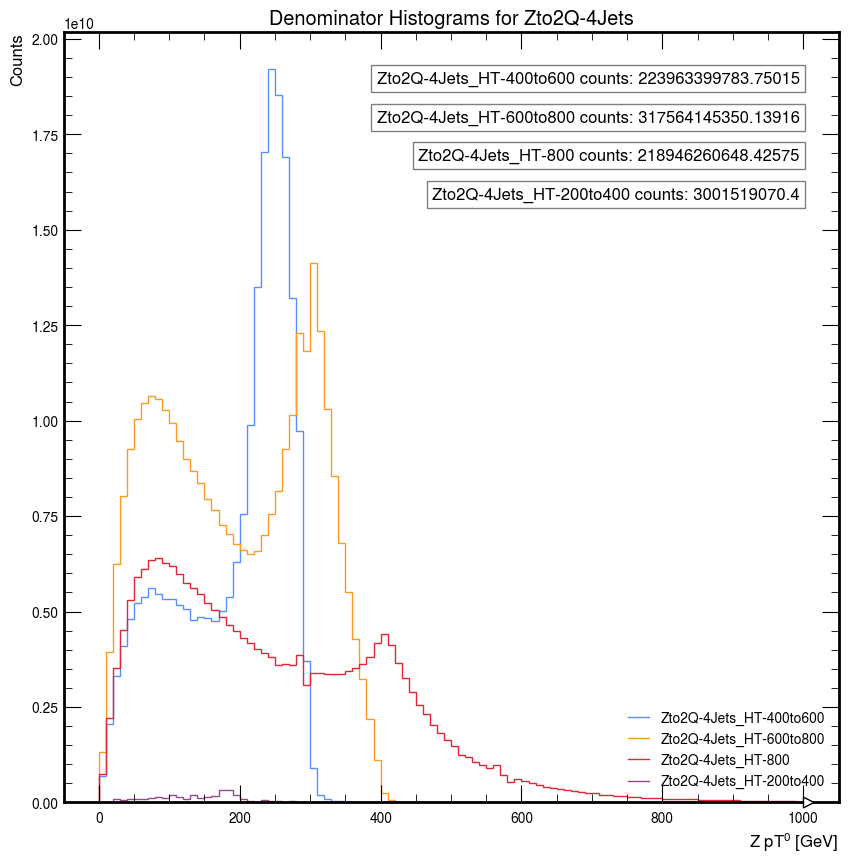

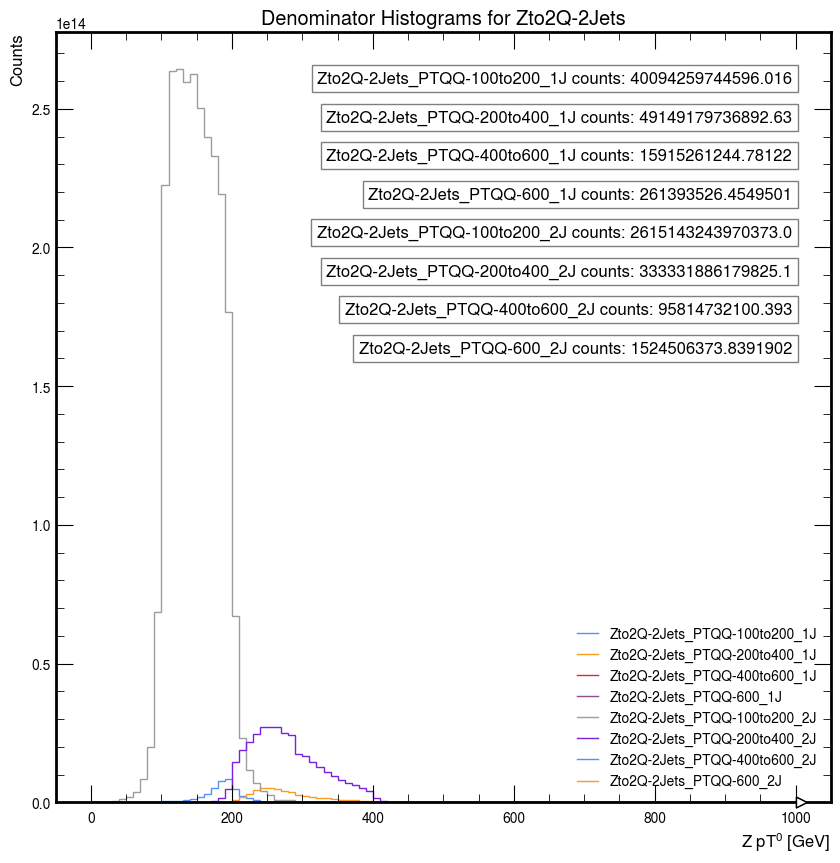

In [112]:
# Generate and save plots
plot_den(hsd, output_dir, var="SDm")
plot_den(hpt_fj, output_dir, var="fjpt")
plot_den(hpt_z, output_dir, var="zpt")


### Plot the triggers

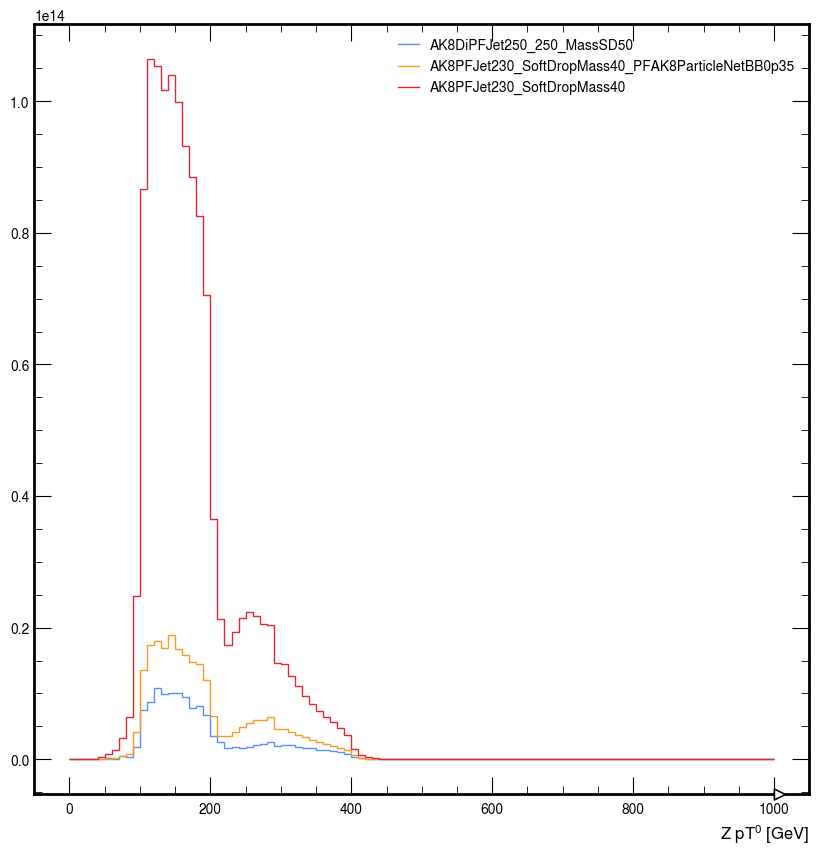

In [113]:
# comparing the triggers
fig, ax = plt.subplots()    
for trigger_title, (triggers, trigger_label) in trigger_dict.items():
    for hlt in triggers:
        hep.histplot(hpt_z[{"cat": hlt, "sample_name": "Zto2Q-2Jets", "process_name": "Zto2Q-2Jets"}], ax=ax, label=hlt)
    #hep.histplot(hpt_z[{"cat": trigger_title, "sample_name": "Zto2Q-2Jets", "process_name": "Zto2Q-2Jets"}], ax=ax, label=trigger_title)

ax.legend()

### Efficiency

In [116]:
import matplotlib.pyplot as plt

def plot_eff(hist_to_plot, sample, sample_label, output_dir, var):
    """
    Plot triggers efficiency histograms and save them to files.
    
    Args:
        hist_to_plot (dict): Dictionary of histograms to plot.
        sample (str): Sample name.  ie. "Zto2Q-4Jets_HT-400to600"
        sample_label (str): Label for the sample. ie. "Zto2Q-4Jets"
        output_dir (str): Directory where the plots will be saved.
    """
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))   #efficiency plot

    for trigger_title, (triggers, trigger_label) in trigger_dict.items():
        for hlt in triggers:
            den = hist_to_plot[{"cat": "denominator", "sample_name": sample, "process_name": sample_label}]
            num = hist_to_plot[{"cat": hlt, "sample_name": sample, "process_name": sample_label}]

            num_view = num.view()
            den_view = den.view()
            
            hep.histplot(
                num / den,
                #yerr=abs((clopper_pearson_interval(num_view, den_view) - num_view) / den_view),
                label=hlt,
                ax=ax,
                flow="none",
            )
    ax.legend()

    ax.set_ylabel("Signal Trig. Eff.")
    ax.set_ylim(0, 1)
    plt.title(f"Signal Trigger Efficiency for {sample}")
    
    # Save the plot
    #plt.savefig(f"{output_dir}/{var}_signal_trigger_efficiency_{sample}.png")
    #plt.close(fig)

# Define the output directory where plots will be saved
output_dir = "plots"

# Create the output directory if it does not exist
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)



/var/folders/5l/g72gr7pn1qjfpv9ts3r8m3x80000gn/T/ipykernel_103/1925801122.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(6, 4))   #efficiency plot


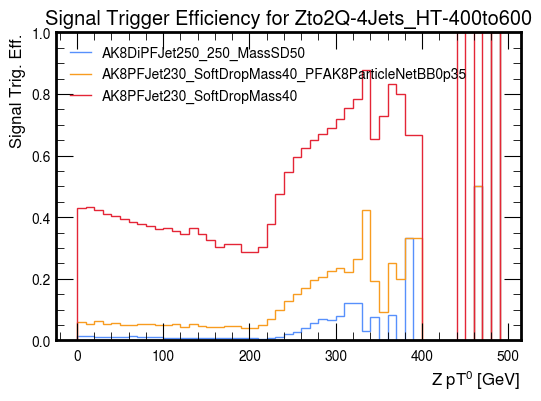

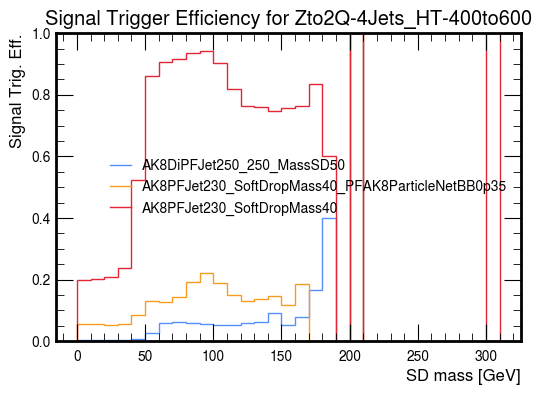

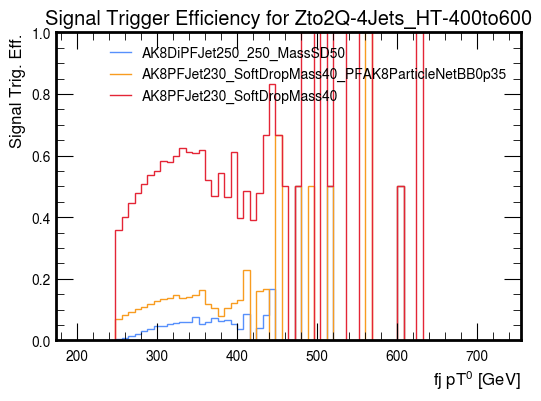

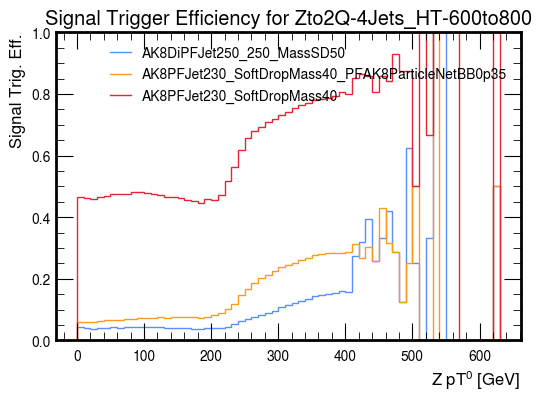

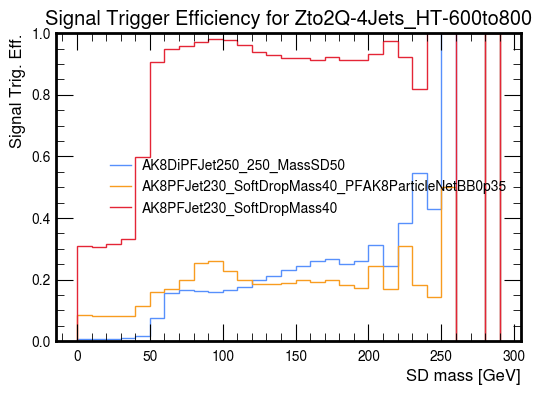

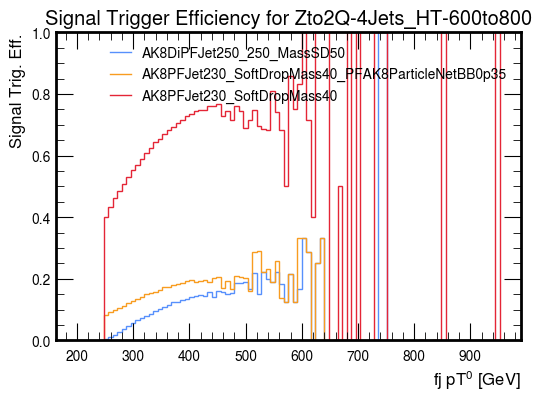

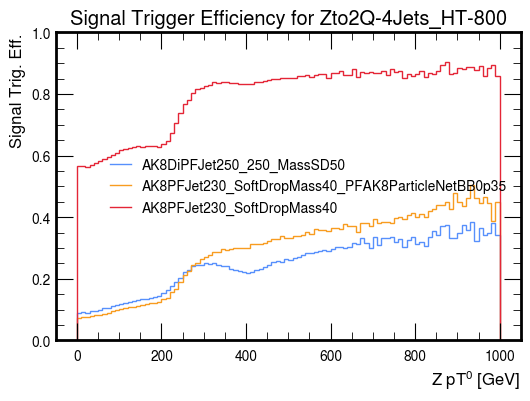

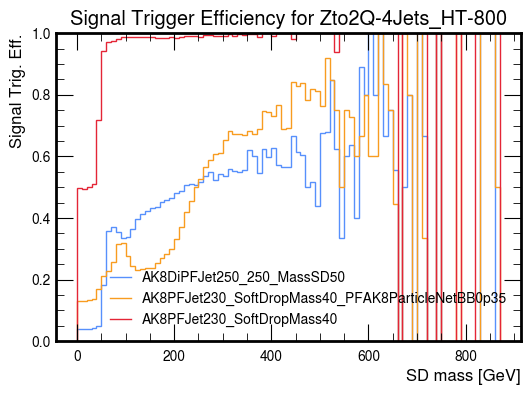

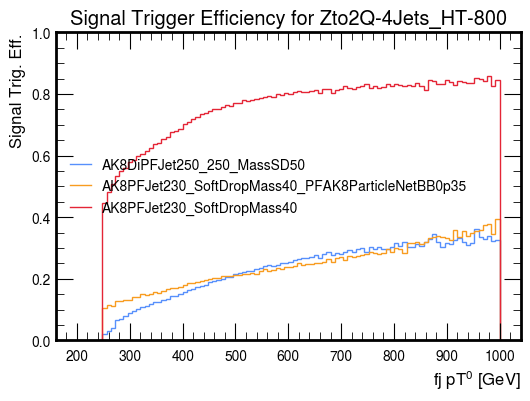

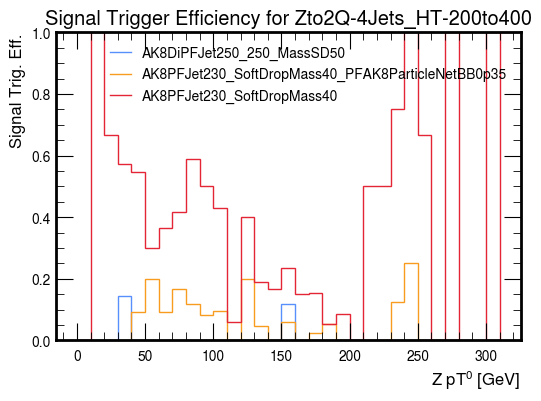

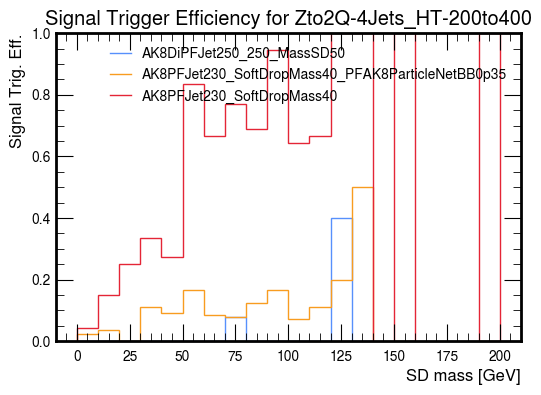

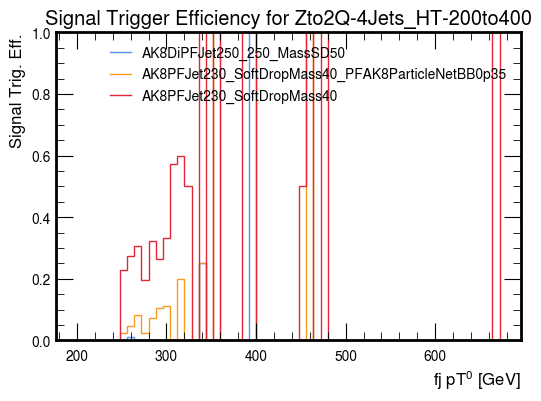

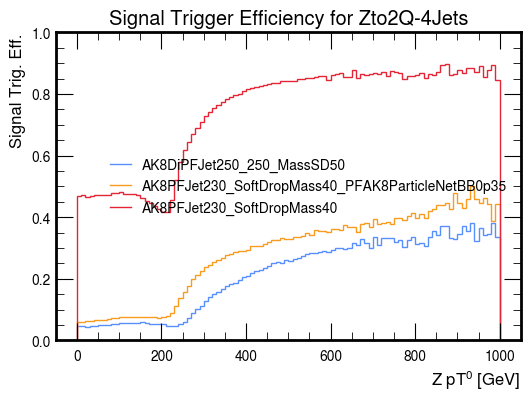

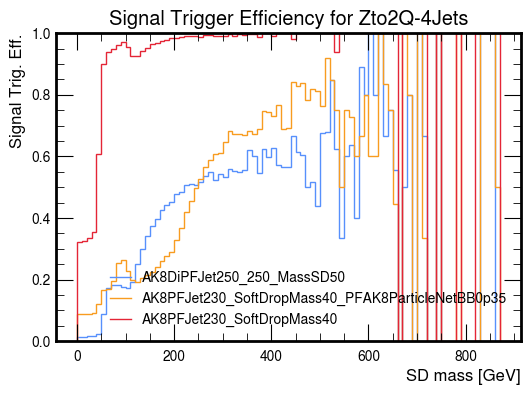

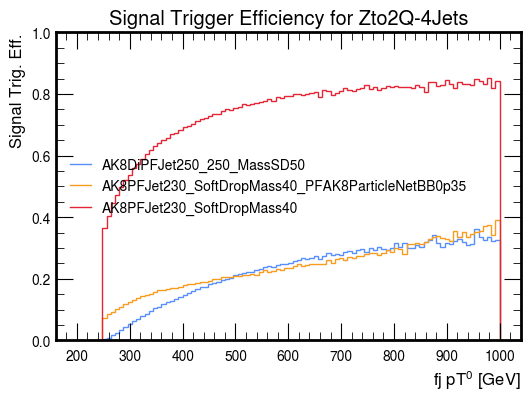

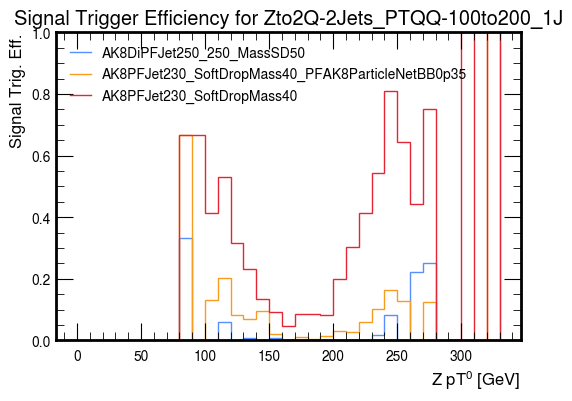

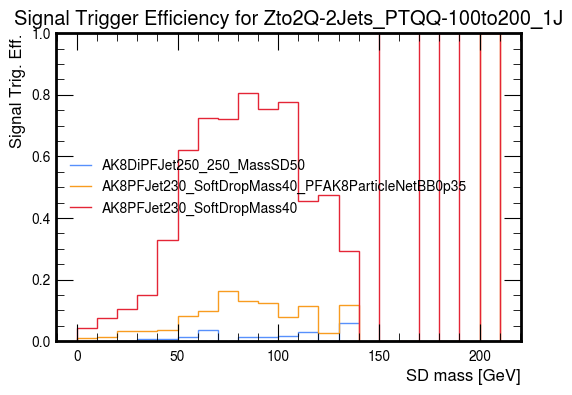

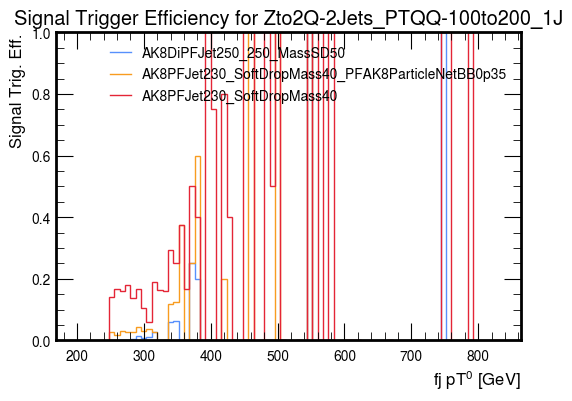

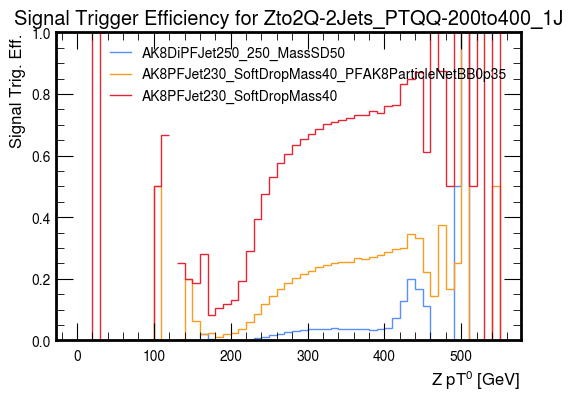

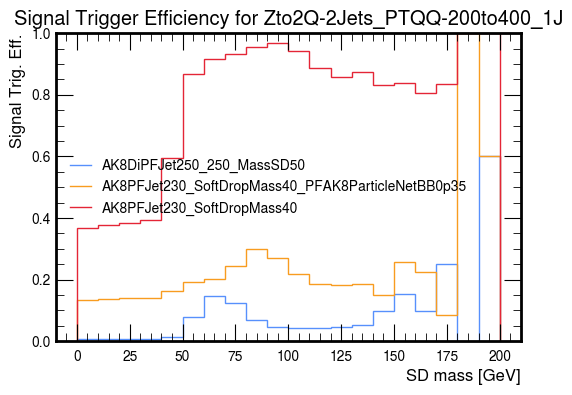

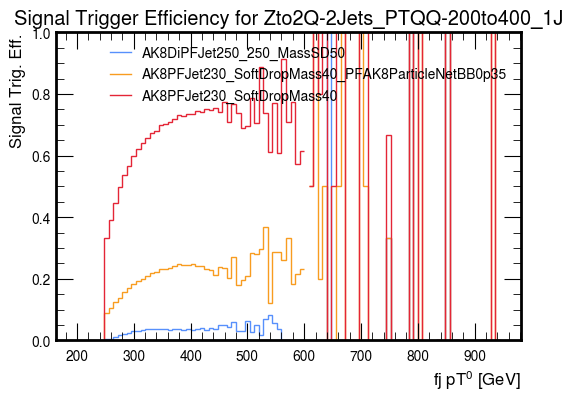

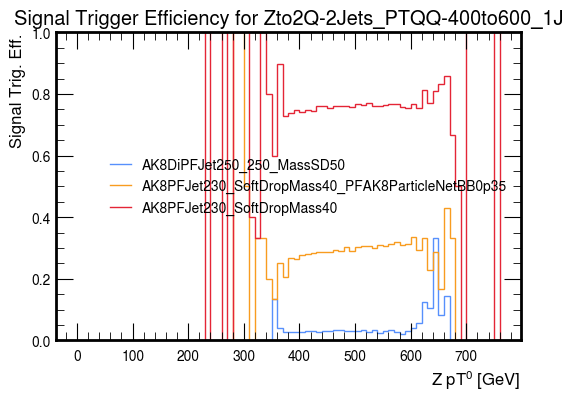

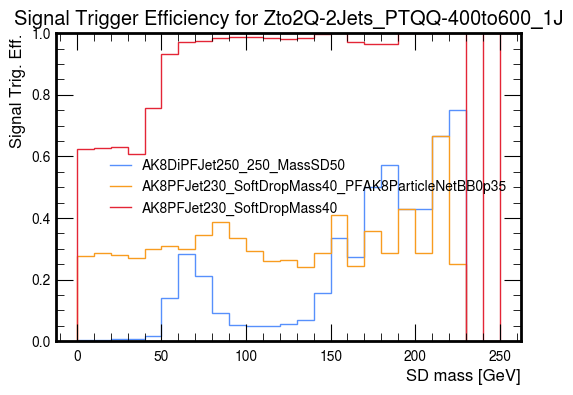

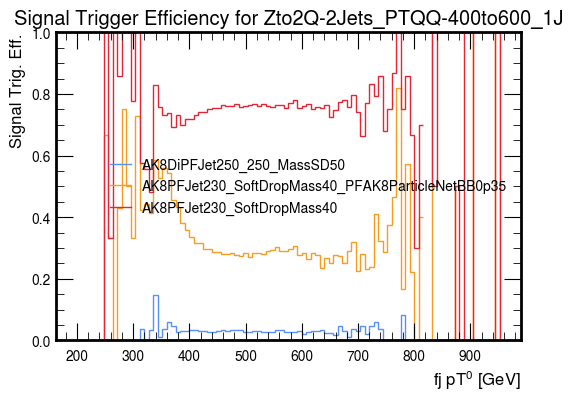

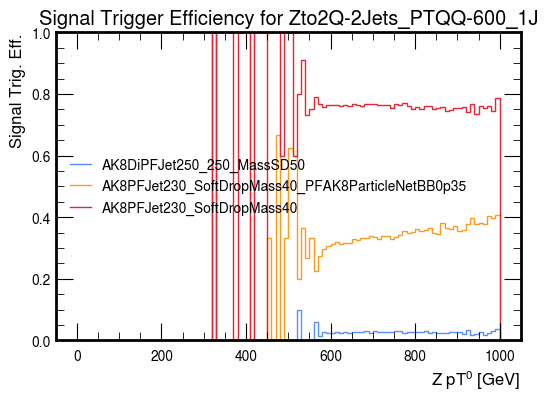

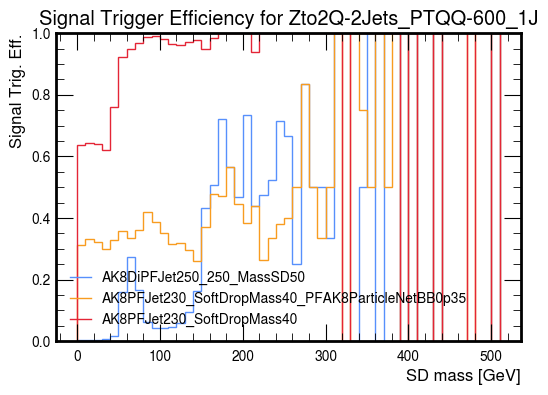

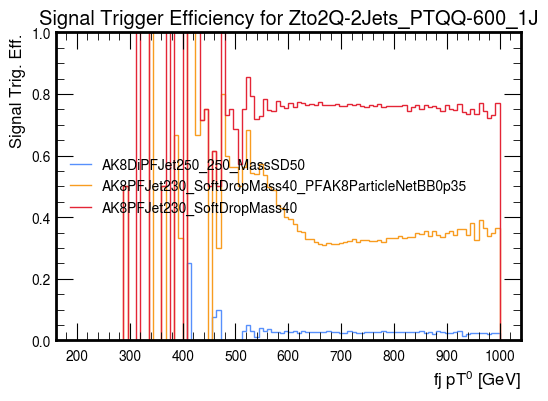

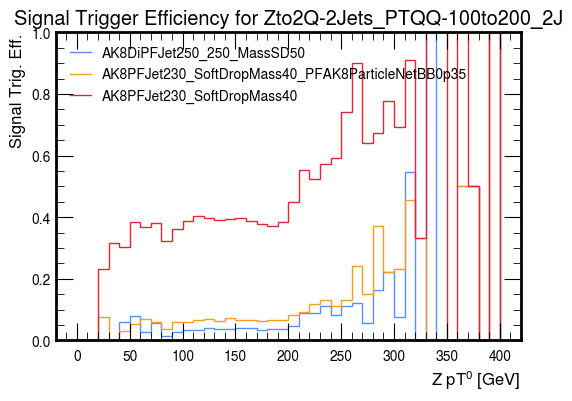

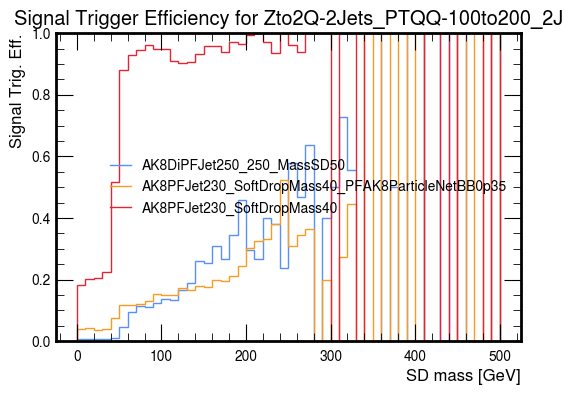

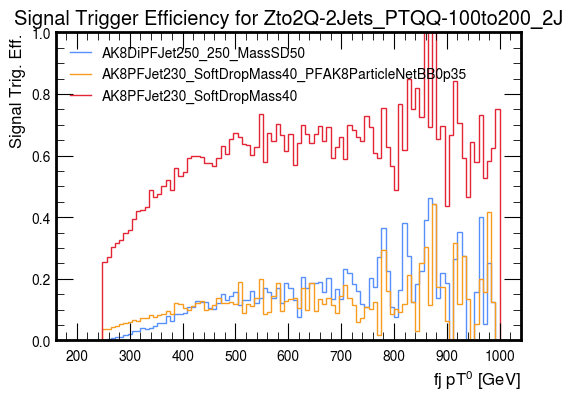

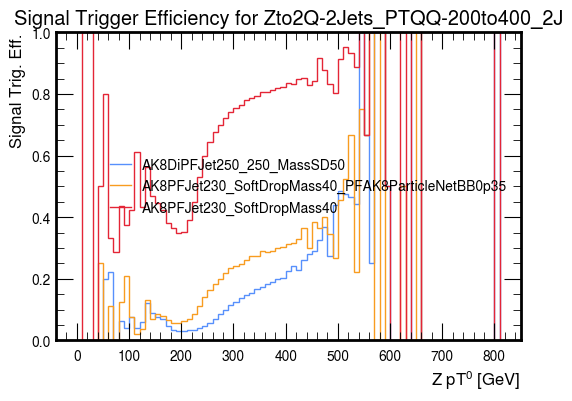

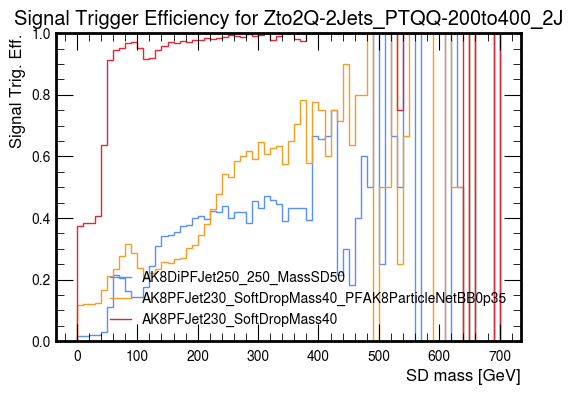

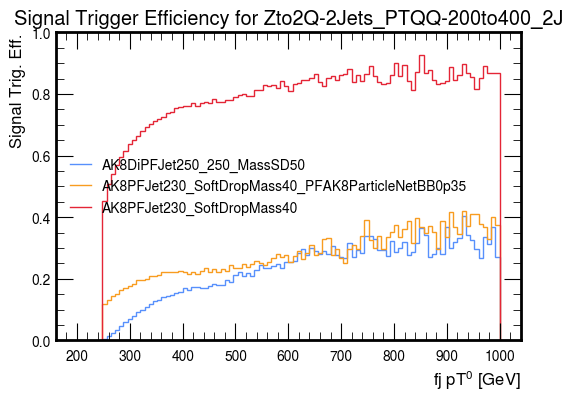

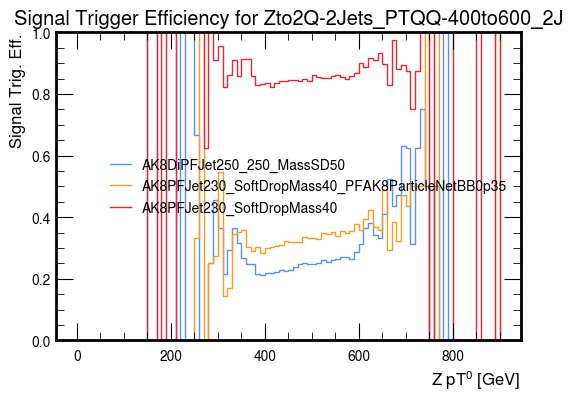

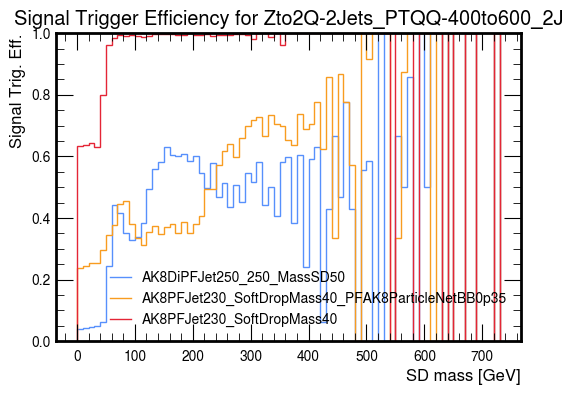

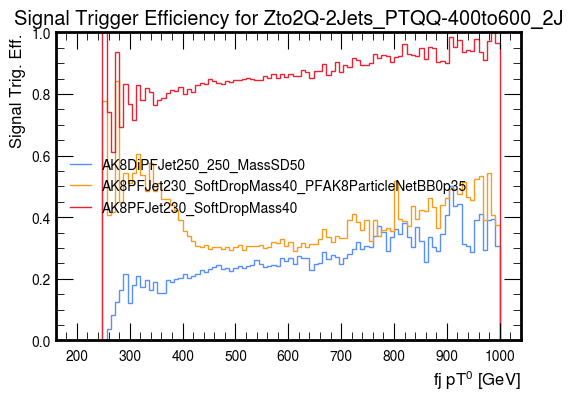

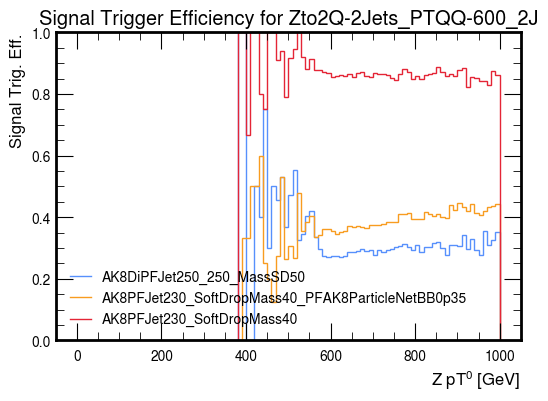

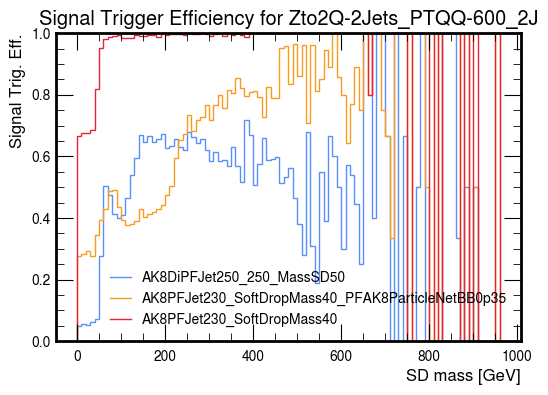

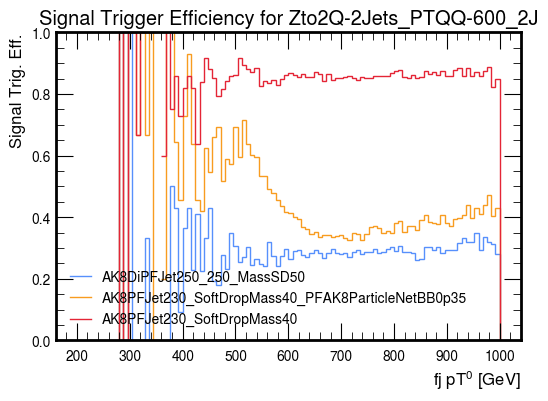

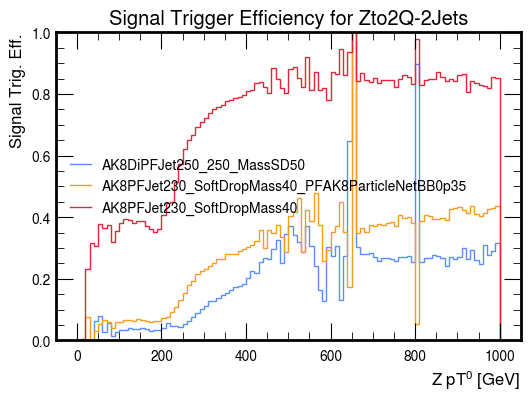

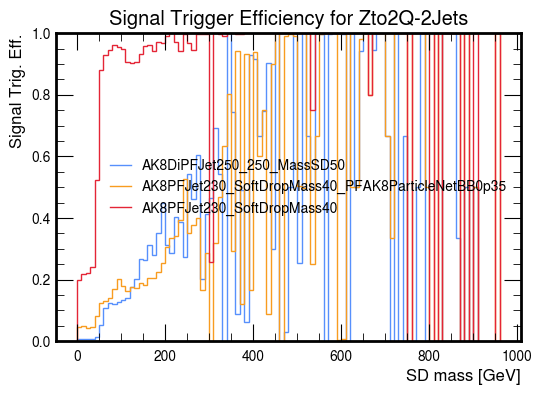

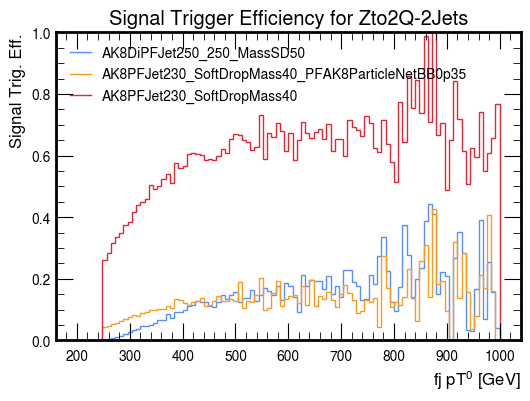

In [118]:
# Generate and save plots
for label, selector in samples.items():
    for sample in selector:
        plot_eff(hpt_z, sample, label, output_dir, var="zpt")
        plot_eff(hsd, sample, label, output_dir, var="SDm")
        plot_eff(hpt_fj, sample, label, output_dir, var="fjpt")

    plot_eff(hpt_z, label, label, output_dir, var="zpt")
    plot_eff(hsd, label, label, output_dir, var="SDm")
    plot_eff(hpt_fj, label, label, output_dir, var="fjpt")

# 2D hist of FatJetPt and SoftDropMass


In [ ]:
import hist
import matplotlib.pyplot as plt
import numpy as np

# Define the axes
fjpt_axis = hist.axis.Regular(100, 200, 1000, name="pt", label=r"fj pT$^0$ [GeV]")
SDm_axis = hist.axis.Regular(100, 0, 300, name="SDm", label="Soft Drop Mass [GeV]")
cat_axis = hist.axis.StrCategory([], name="cat", growth=True)
sample_axis = hist.axis.StrCategory([], name="sample_name", growth=True)

# Create the histogram
h2d = hist.Hist(fjpt_axis, SDm_axis, cat_axis, sample_axis)

In [ ]:
# Filling the histogram

for label, sample_dict in events_dict.items():
    for sample_name, events in sample_dict.items():
        #pt_z = events["GenVPt"][0]
        pt_fj = events["ak8FatJetPt"][0]
        SDm_fj = events["ak8FatJetmsoftdrop"][0]
        wd = events["weight"][0]
        
        selection = SDm_fj > 40

        # For separated samples
        #h2d.fill(pt=pt_0[selection], cat="denominator", sample_name=sample, weight=wd[selection])
        #h2d.fill(pt=pt_0, SDm=SDm_0 cat="denominator", sample_name=sample) #no weight or cuts

        #for all samples
        h2d.fill(pt=pt_fj, SDm=SDm_fj, cat="denominator", sample_name=label, weight=wd) #no weight or cuts
        for trigger_title, (triggers, trigger_label) in trigger_dict.items():
            trigger_selection = np.zeros_like(selection)
            for hlt in triggers:
                trigger_selection |= (events[hlt].values == 1).squeeze()
            num_selection = trigger_selection
            #hpt.fill(pt=pt_0[num_selection & selection], cat=trigger_title, sample_name=sample, weight=wd[num_selection & selection])
            #hpt.fill(pt=pt_0[num_selection & selection], cat=trigger_title, sample_name="todas", weight=wd[num_selection & selection])

            #h2d.fill(pt=pt_0[num_selection], SDm=SDm_0[num_selection], cat=trigger_title, sample_name=sample)
            h2d.fill(pt=pt_fj[num_selection], SDm=SDm_fj[num_selection], cat=trigger_title, sample_name=label, weight=wd[num_selection])


In [ ]:
# Plot the 2D histogram
for label, selector in samples.items():
    fig, ax = plt.subplots()
    hep.hist2dplot(h2d[{"cat": "denominator", "sample_name": label}], ax=ax)
    #ax.set_xlabel("X-axis Label [units]")
    #ax.set_ylabel("Y-axis Label [units]")
    plt.title(f"FatJet pt vs. SoftDrop mass from {label}")


    plt.savefig(f"{output_dir}/fjpt_vs_SDM_{label}_withWeight_noselection_notrigger.png")
    plt.show()


In [ ]:
for label, selector in samples.items():
    fig, ax = plt.subplots()#1, 1, figsize=(6, 4))
    for trigger_title, (triggers, trigger_label) in trigger_dict.items():
        hep.hist2dplot(h2d[{"cat": trigger_title, "sample_name": label}], ax=ax, flow="none")
        ax.legend()
    #leg = ax.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.title(f"FatJet pt vs. SofrDrop mass from {label}")

    # Save the plot
    plt.savefig(f"{output_dir}/fjpt_vs_SDm_{label}_withWeight_noselection_withtrigger.png")
    #plt.close(fig)